In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn import tree

# Decision Tree Classifiers

![](images/cube_tree.pdf)

### Important Considerations

- Supervised Learning (labels known)

- Can be used for both classification and regression

- Difficult to reproduce

- Good for exploratory analysis of data

### Iris Example


**Use measurements to predict species**


![](images/iris.png)

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
iris = load_iris()

In [4]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [5]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [6]:
len(X_test)

38

In [7]:
#load classifier
clf = tree.DecisionTreeClassifier()

In [8]:
#fit train data
clf = clf.fit(X_train, y_train)

In [9]:
#examine score
clf.score(X_train, y_train)

1.0

In [10]:
#against test set
clf.score(X_test, y_test)

0.97368421052631582

In [11]:
#cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv=10)

array([ 1.        ,  0.91666667,  0.83333333,  1.        ,  0.91666667,
        0.81818182,  0.90909091,  1.        ,  1.        ,  1.        ])

In [12]:
#list of feature importance
clf.feature_importances_

array([ 0.01340675,  0.        ,  0.0341195 ,  0.95247374])

### Visualizing Decision Tree

`pip install pydotplus`

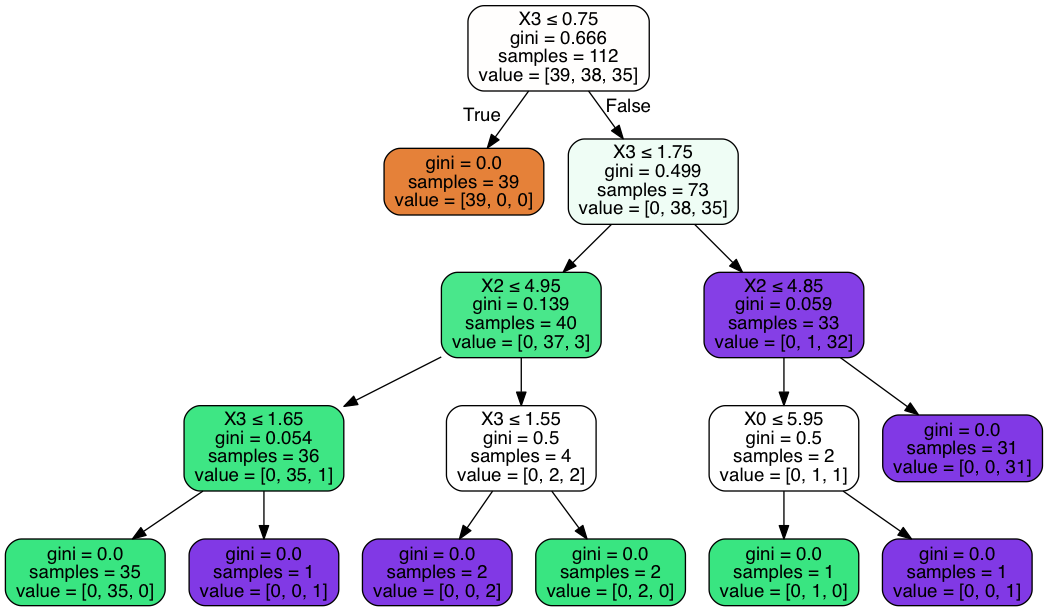

In [13]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [14]:
import seaborn as sns
iris = sns.load_dataset('iris')

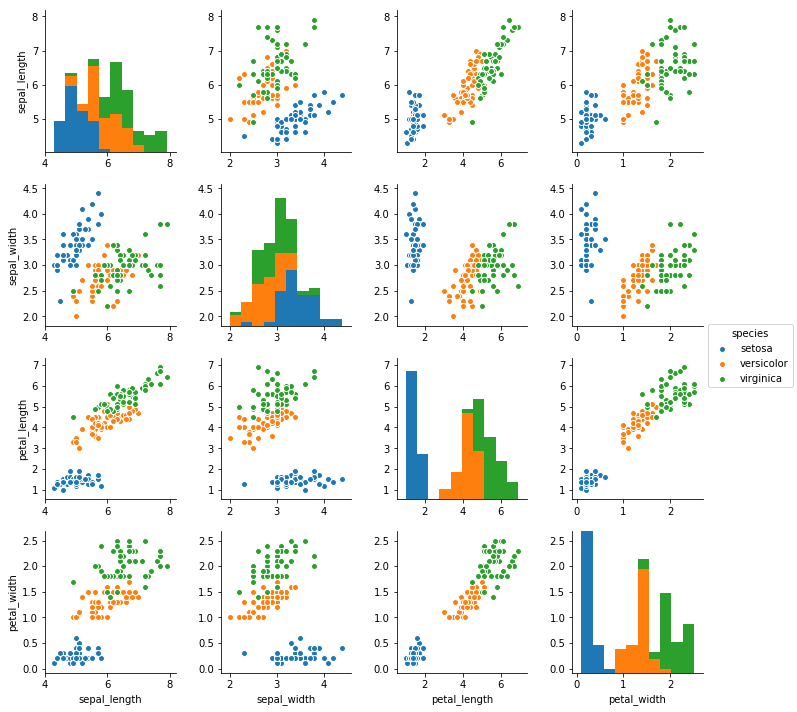

In [15]:
sns.pairplot(data = iris, hue = 'species');

In [16]:
clf = DecisionTreeClassifier(max_depth = 1).fit(X_train, y_train)

In [17]:
clf.score(X_train, y_train)

0.6875

In [18]:
clf.score(X_test, y_test)

0.60526315789473684

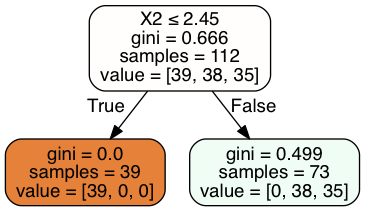

In [19]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [20]:
clf = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)

In [21]:
clf.score(X_train, y_train)

0.9642857142857143

In [22]:
clf.score(X_test, y_test)

0.94736842105263153

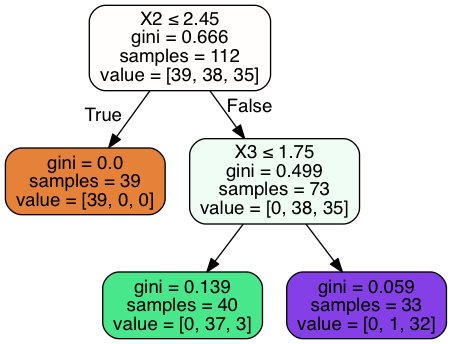

In [23]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

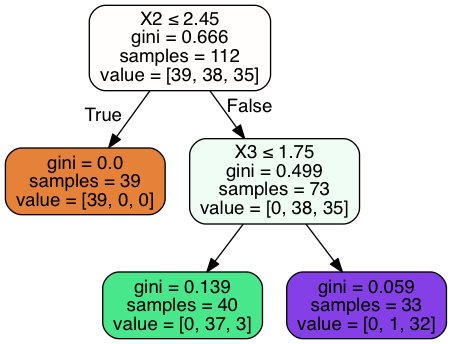

In [24]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data2 = StringIO()
export_graphviz(clf, out_file=dot_data2,  
                filled=True, rounded=True,
                special_characters=True)
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph2.create_png())

In [31]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

In [37]:
AH_data = pd.read_csv("data/tree_addhealth.csv")

data_clean = AH_data.dropna()

data_clean.dtypes

BIO_SEX      float64
HISPANIC     float64
WHITE        float64
BLACK        float64
NAMERICAN    float64
ASIAN        float64
age          float64
TREG1        float64
ALCEVR1      float64
ALCPROBS1      int64
marever1       int64
cocever1       int64
inhever1       int64
cigavail     float64
DEP1         float64
ESTEEM1      float64
VIOL1        float64
PASSIST        int64
DEVIANT1     float64
SCHCONN1     float64
GPA1         float64
EXPEL1       float64
FAMCONCT     float64
PARACTV      float64
PARPRES      float64
dtype: object

In [38]:
data_clean.describe()

BIO_SEX     HISPANIC        WHITE        BLACK    NAMERICAN  \
count  4575.000000  4575.000000  4575.000000  4575.000000  4575.000000   
mean      1.521093     0.111038     0.683279     0.236066     0.036284   
std       0.499609     0.314214     0.465249     0.424709     0.187017   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     0.000000     0.000000   
50%       2.000000     0.000000     1.000000     0.000000     0.000000   
75%       2.000000     0.000000     1.000000     0.000000     0.000000   
max       2.000000     1.000000     1.000000     1.000000     1.000000   

             ASIAN          age        TREG1      ALCEVR1    ALCPROBS1  \
count  4575.000000  4575.000000  4575.000000  4575.000000  4575.000000   
mean      0.040437    16.493052     0.176393     0.527432     0.369180   
std       0.197004     1.552174     0.381196     0.499302     0.894947   
min       0.000000    12.676712     0.000000     0.000000     0.000000   
25%       0.000000    15.254795     0.000000     0.000000     0.000000   
50%       0.000000    16.509589     0.000000     1.000000     0.000000   
75%       0.000000    17.679452     0.000000     1.000000     0.000000   
max       1.000000    21.512329     1.000000     1.000000     6.000000   

          ...           ESTEEM1        VIOL1      PASSIST     DEVIANT1  \
count     ...       4575.000000  4575.000000  4575.000000  4575.000000   
mean      ...         40.952131     1.618579     0.102514     2.645027   
std       ...          5.381439     2.593230     0.303356     3.520554   
min       ...         18.000000     0.000000     0.000000     0.000000   
25%       ...         38.000000     0.000000     0.000000     0.000000   
50%       ...         40.000000     0.000000     0.000000     1.000000   
75%       ...         45.000000     2.000000     0.000000     4.000000   
max       ...         50.000000    19.000000     1.000000    27.000000   

          SCHCONN1         GPA1       EXPEL1     FAMCONCT      PARACTV  \
count  4575.000000  4575.000000  4575.000000  4575.000000  4575.000000   
mean     28.360656     2.815647     0.040219    22.570557     6.290710   
std       5.156385     0.770167     0.196493     2.614754     3.360219   
min       6.000000     1.000000     0.000000     6.300000     0.000000   
25%      25.000000     2.250000     0.000000    21.700000     4.000000   
50%      29.000000     2.750000     0.000000    23.700000     6.000000   
75%      32.000000     3.500000     0.000000    24.300000     9.000000   
max      38.000000     4.000000     1.000000    25.000000    18.000000   

           PARPRES  
count  4575.000000  
mean     13.398033  
std       2.085837  
min       3.000000  
25%      12.000000  
50%      14.000000  
75%      15.000000  
max      15.000000  

[8 rows x 25 columns]

In [33]:
predictors = data_clean[['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
'age','ALCEVR1','ALCPROBS1','marever1','cocever1','inhever1','cigavail','DEP1',
'ESTEEM1','VIOL1','PASSIST','DEVIANT1','SCHCONN1','GPA1','EXPEL1','FAMCONCT','PARACTV',
'PARPRES']]

targets = data_clean.TREG1

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

print(pred_train.shape, pred_test.shape, tar_train.shape, tar_test.shape)

(2745, 24) (1830, 24) (2745,) (1830,)


In [34]:
#Build model on training data
classifier=DecisionTreeClassifier(max_depth = 4)
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[1407,   95],
       [ 179,  149]])

In [35]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.85027322404371586

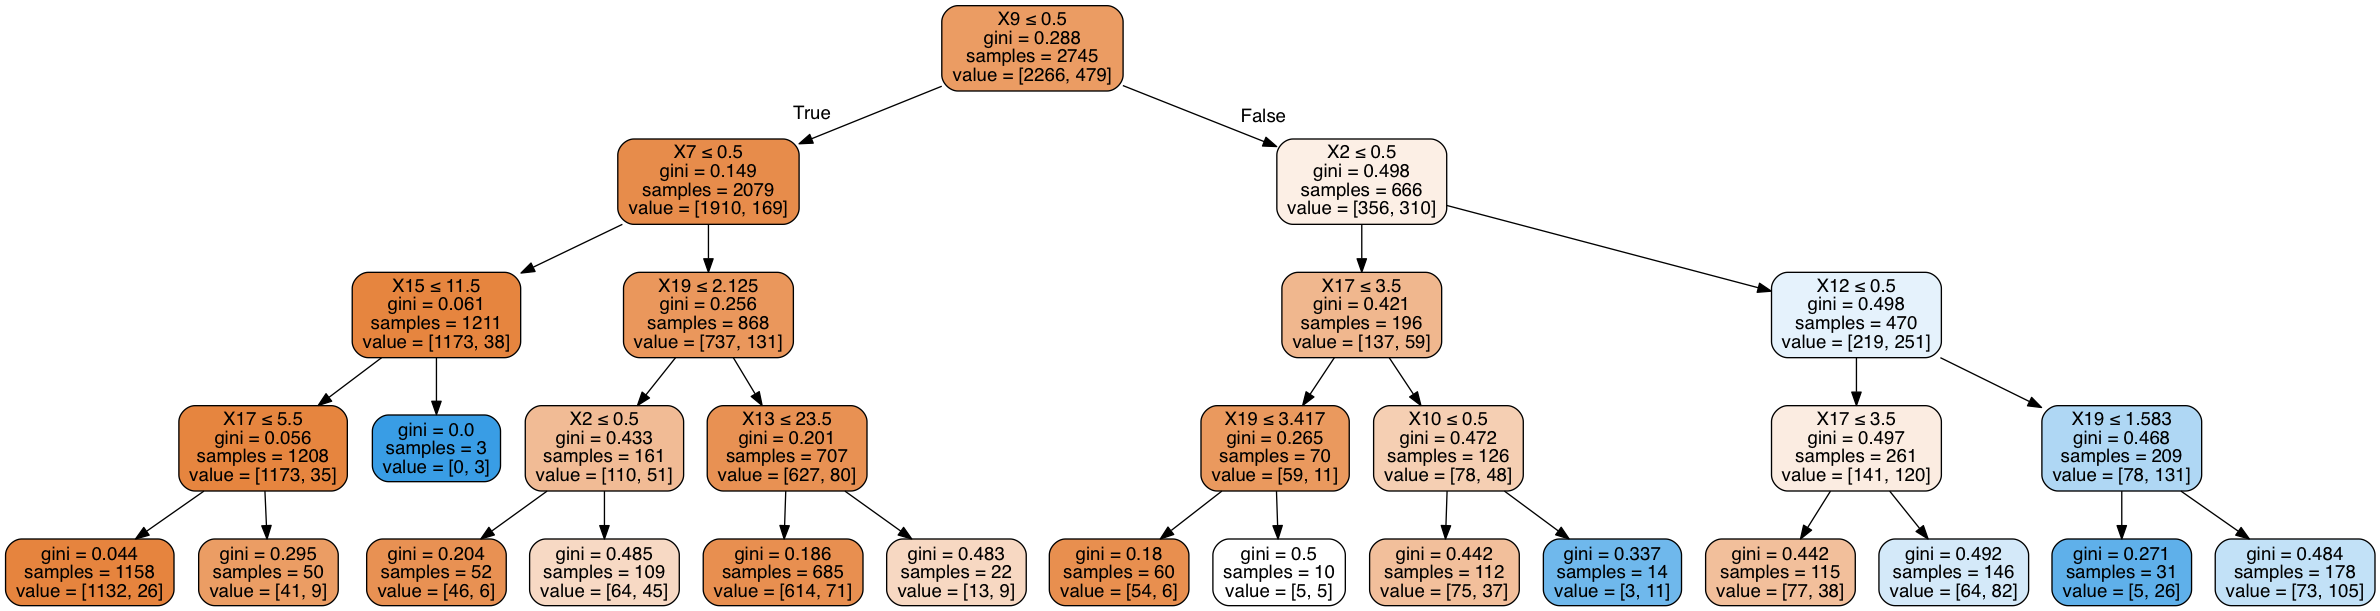

In [36]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data2 = StringIO()
export_graphviz(classifier, out_file=dot_data2,  
                filled=True, rounded=True,
                special_characters=True)
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph2.create_png())